## Задание

Распознайте рукописную цифру, написанную на листе от руки.
Последовательность шагов следующая:

*   На бумаге рисуем произвольную цифру (желательно нарисовать цифру размером не
более 5 * 5 мм и без наклона. В занятии нейронка обучалась на цифрах американских студентов. Эти цифры были написаны на тетрадных листах в клетку и имели схожий размер).
*   Фотографируем. Загружаем фото в Collaboratory.
*   С помощью функции image.load_img(path, target_size=(28, 28), color_mode = ‘grayscale’) загружаем картинку в переменную.
*   С помощью функции image.img_to_array(img) преобразуем изображение в numpy-массив.
*   Выполняем инверсию цветов, нормирование и решейп массива.
*   Выполняем распознавание собственной рукописной цифры.

Примечание: точность распознавания рукописных цифр может быть достаточно низкой, т.к. рукописные цифры после преобразований хоть и похожи на содержащиеся в базе, но могут отличаться по конфигурации, толщине линий и т.д.


In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

E0000 00:00:1739792500.344775    1063 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739792500.367755    1063 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Ваше решение


(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

x_train = x_train_org.reshape(x_train_org.shape[0], -1)
x_test = x_test_org.reshape(x_test_org.shape[0], -1)

# Преобразование x_train в тип float32 (числа с плавающей точкой) и нормализация
x_train = x_train.astype("float32") / 255.0

# Преобразование x_test в тип float32 (числа с плавающей точкой) и нормализация
x_test = x_test.astype("float32") / 255.0

CLASS_COUNT = 10


# Преобразование ответов в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, CLASS_COUNT)
y_test = utils.to_categorical(y_test_org, CLASS_COUNT)



In [3]:
# Создание последовательной модели
model = Sequential()

# Добавление полносвязного слоя на 800 нейронов с relu-активацией
model.add(Dense(800, input_dim=784, activation="relu"))

# Добавление полносвязного слоя на 400 нейронов с relu-активацией
model.add(Dense(400, activation="relu"))

# Добавление полносвязного слоя с количеством нейронов по числу классов с softmax-активацией
model.add(Dense(CLASS_COUNT, activation="softmax"))

# Компиляция модели
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

/home/aledonio/.cache/pypoetry/virtualenvs/global-cKEoLTwX-py3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1739792516.628542    1063 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5563 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [10]:
model.fit(
    x_train,  # обучающая выборка, входные данные
    y_train,  # обучающая выборка, выходные данные
    batch_size=128,  # кол-во примеров, которое обрабатывает нейронка перед одним изменением весов
    epochs=15,  # количество эпох, когда нейронка обучается на всех примерах выборки
    verbose=1,
)  # 0 - не визуализировать ход обучения, 1 - визуализировать

Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9987 - loss: 0.0049
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9997 - loss: 0.0015
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9995 - loss: 0.0022
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9981 - loss: 0.0074
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9992 - loss: 0.0025
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9987 - loss: 0.0057
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9994 - loss: 0.0024
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9983 - loss: 0.0069
Epoch 9/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9992 - loss: 0.0028
Epoch 10/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9993 - loss: 0.0029
Epoch 11/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9995 - loss: 0.0021
Epoch 12/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [4]:
# model.save_weights("dz_ultra_pro.weights.h5")
model.load_weights("dz_ultra_pro.weights.h5")


/home/aledonio/.cache/pypoetry/virtualenvs/global-cKEoLTwX-py3.12/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [5]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

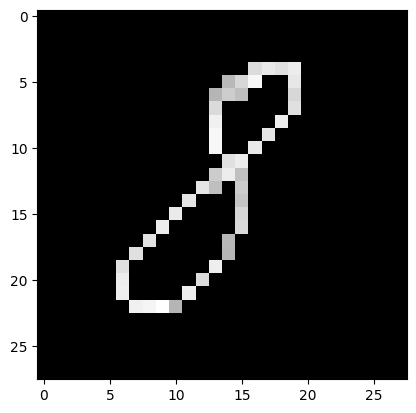

In [7]:
img = image.load_img("image_8.png", target_size=(28, 28), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = 255 - img_array
img_array = np.where(img_array < 150, 0, img_array)
plt.imshow(img_array, cmap="gray")
img_train = img_array.reshape(1, -1).astype("float32")  / 255.0

In [9]:
prediction = model.predict(img_train)
predicted_class = np.argmax(prediction)
print("Распознанная цифра:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Распознанная цифра: 8
